## Institut des Algorithmes du Sénégal

## Insurance Forecast using Regression models

### Different regression models that we will consider:

Regression analysis is a technique we can use to understand the relationship between one or more predictor variables and a response variable. 

- Linear Regression
- Polynomial Regression
- Ridge Regression
- Lasso Regression
- Support Vector Regression
- Decision Tree Regression
- Random Forest Regression

In [20]:
# importing libraries

import numpy as np # data manipulation
import pandas as pd # data manipulation
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
%matplotlib inline

In [21]:
# importing the dataset
df = pd.read_csv('insurance.csv')

# viewing top 5 rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Overviewing Columns:

- age: age of primary beneficiary
- sex:  gender..female, male
- bmi: body mass index, providing an understanding of body, weights that are relatively high or low relative to   height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- children: number of children covered by health insurance / number of dependents
- smoker: smoking
- region: the beneficiary's residential area.
- charges: individual medical costs billed by health insurance.

## One-Hot encoding



In [22]:
# encoding
Male = pd.get_dummies(df['sex'], drop_first=True)
df = pd.concat([df, Male], axis=1 )

smoker = pd.get_dummies(df['smoker'], drop_first=True)
df = pd.concat([df, smoker], axis=1 )

region = pd.get_dummies(df['region'])
df = pd.concat([df, region], axis=1 )

In [23]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,yes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0,1,0,0


## Regularization

## 1. Lasso Regresson : 

In linear regression, the optimization function or loss function is known as the residual sum of squares (RSS), which is used to define and measure the error of the model.

La régression Ridge optimise le problème qui suit :

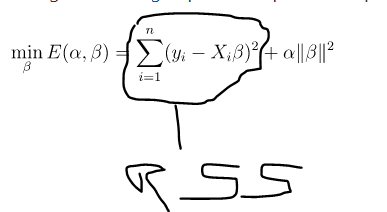

La solution de ctte équation s'exprime:

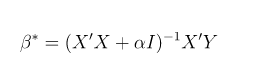

## 2. Lasso regression 
La regression lasso optimise le probléme suivant 🇰

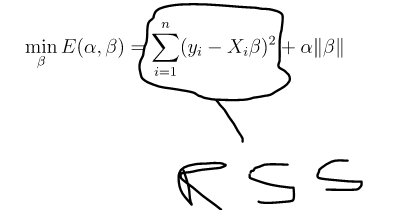

In [24]:
df = df.drop(['sex', 'smoker', 'region'], axis=1)
df.head()

,age,bmi,children,charges,male,yes,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0,0
4,32,28.880,0,3866.85520,1,0,0,1,0,0


In [25]:
X=df.drop('charges', axis=1)  # independent variable
y=df['charges'] # dependent variable

In [26]:
# splitting the dataset into train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

## Ridge Regression

In [39]:
from sklearn.preprocessing import StandardScaler # for feature scaling
from sklearn.pipeline import Pipeline # for using pipeline
from sklearn.linear_model import Ridge  # for ridege regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge())
]

ridge_pipe = Pipeline(steps)

In [40]:
# Applying Grid Search to find the best model and the best parameters

from sklearn.model_selection import GridSearchCV  # for hypertuning

parameters =  {  'model__alpha' : [43],
                 'model__fit_intercept' : [True],
                 'model__tol' : [0.0001],
                 'model__solver' : ['auto'],## Optimisation
                'model__random_state': [42] 
}

regressor_ridge = GridSearchCV(ridge_pipe, parameters, cv=10)
regressor_ridge = regressor_ridge.fit(X, y.ravel())

In [41]:
print(regressor_ridge.best_score_)
print(regressor_ridge.best_params_)

0.8363491525351024
{'model__alpha': 43, 'model__fit_intercept': True, 'model__random_state': 42, 'model__solver': 'auto', 'model__tol': 0.0001}


In [42]:
# Predicting Cross Validation Score of the Test set
cv_ridge = regressor_ridge.best_score_

# Predicting R2 Score of the Train set 
y_pred_ridge_train = regressor_ridge.predict(X_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting R2 Score of the Test set
y_pred_ridge_test = regressor_ridge.predict(X_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting MAE and RMSE of the Test set
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
mae_ridge = mean_absolute_error(y_test, y_pred_ridge_test)

# printing the results
print('CV: ', cv_ridge.mean())
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print('MAE:', mae_ridge)
print("RMSE: ", rmse_ridge)



CV:  0.8363491525351024
R2_score (train):  0.8534897813307437
R2_score (test):  0.823658468159339
MAE: 3020.3438082148186
RMSE:  5107.173302796819


## Lasso Regression

In [43]:
from sklearn.linear_model import Lasso  # for lasso regression

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso())
]

lasso_pipe = Pipeline(steps)

In [44]:

parameters =  {  'model__alpha' : [0.9949],
                 'model__fit_intercept' : [True],
                 'model__tol' : [0.0001],
                 'model__max_iter' : [5000],
                'model__random_state': [42] 
}
regressor_lasso = GridSearchCV(lasso_pipe, parameters, cv=10, n_jobs = -1, verbose = 4)
regressor_lasso = regressor_lasso.fit(X, y.ravel())

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished


In [46]:
print(regressor_lasso.best_score_)
print(regressor_lasso.best_params_)

0.8362960263032919
{'model__alpha': 0.9949, 'model__fit_intercept': True, 'model__max_iter': 5000, 'model__random_state': 42, 'model__tol': 0.0001}


In [47]:
# Predicting Cross Validation Score
cv_lasso = regressor_lasso.best_score_

# Predicting R2 Score of the Train set
y_pred_lasso_train = regressor_lasso.predict(X_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score of the Test set
y_pred_lasso_test = regressor_lasso.predict(X_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting MAE and RMSE pf the Test set
rmse_lasso = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
mae_lasso = mean_absolute_error(y_test, y_pred_lasso_test)

# printing the results
print('CV: ', cv_lasso.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print('MAE:', mae_lasso)
print("RMSE: ", rmse_lasso)


CV:  0.8362960263032919
R2_score (train):  0.8535034125483336
R2_score (test):  0.8251179958641167
MAE: 2974.5084565075426
RMSE:  5085.994092242372


In [48]:
models = [
          ('Ridge Regression', rmse_ridge, r2_score_ridge_train, r2_score_ridge_test, cv_ridge.mean()),
          ('Lasso Regression', rmse_lasso, r2_score_lasso_train, r2_score_lasso_test, cv_lasso.mean())  
         ]

In [49]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Ridge Regression,5107.173303,0.853490,0.823658,0.836349
1,Lasso Regression,5085.994092,0.853503,0.825118,0.836296


### Visualizing model performance

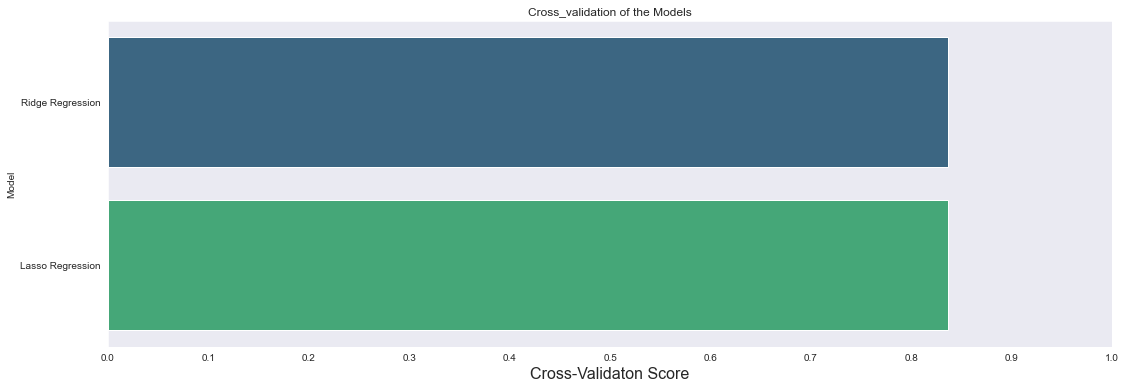

In [50]:
# comaprison of cross-validation between the models

f, axe = plt.subplots(1,1, figsize=(18,6))

predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model', data = predict, ax = axe, palette='viridis')

axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.title('Cross_validation of the Models')
plt.show()

Text(0.5, 0, 'Predict')

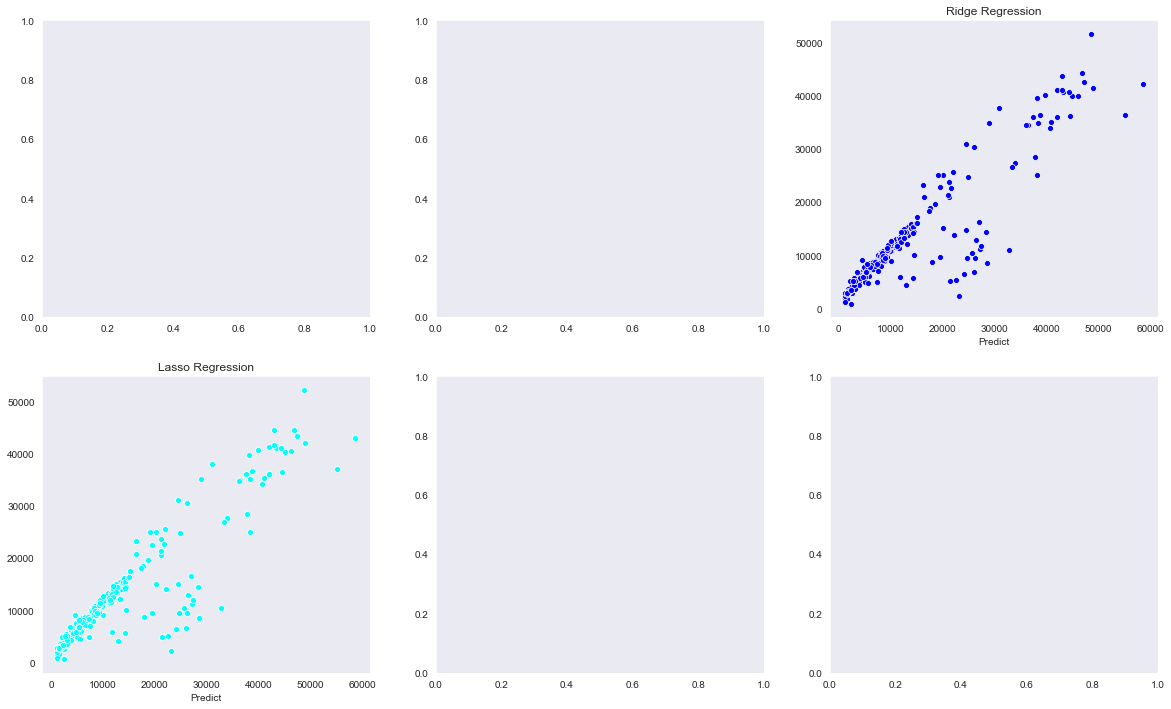

In [51]:
# comparison of R-square between the models
fig, ax = plt.subplots(2,3, figsize=(20,12))



sns.set_style('dark')
h = sns.scatterplot(y_test, y_pred_ridge_test, ax=ax[0,2], color='blue')
h.set_title('Ridge Regression')
h.set_xlabel('Predict')


sns.set_style('dark')
h = sns.scatterplot(y_test, y_pred_lasso_test, ax=ax[1,0], color='cyan')
h.set_title('Lasso Regression')
h.set_xlabel('Predict')


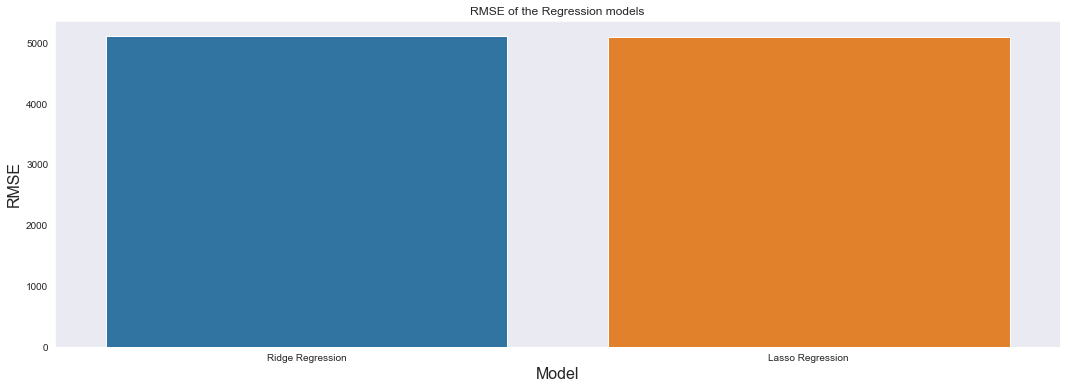

In [52]:
# comparison of RMSE between the models

predict.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(18,6))
sns.barplot(x='Model', y='RMSE', data=predict, ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('RMSE', size=16)
plt.title('RMSE of the Regression models')
plt.show()